In [158]:
import pandas as pd
df = pd.read_csv("Food_Time new.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9085 non-null   object 
 1   ID                           10000 non-null  object 
 2   Delivery_person_ID           10000 non-null  object 
 3   weather_description          9995 non-null   object 
 4   Type_of_order                10000 non-null  object 
 5   Type_of_vehicle              10000 non-null  object 
 6   Delivery_person_Age          10000 non-null  int64  
 7   Delivery_person_Ratings      10000 non-null  float64
 8   Restaurant_latitude          10000 non-null  object 
 9   Restaurant_longitude         10000 non-null  object 
 10  Delivery_location_latitude   10000 non-null  object 
 11  Delivery_location_longitude  10000 non-null  object 
 12  temperature                  9995 non-null   float64
 13  humidity         

In [159]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,temperature,humidity,precipitation,Distance (km)
count,10000.000000,10000.000000,9995.000000,9995.000000,9995.000000,9080.000000
mean,29.522000,4.629370,22.936907,66.164882,0.016233,14.292747
std,5.700348,0.322941,3.379448,15.602939,0.074911,8.376254
min,15.000000,1.000000,6.770000,27.000000,0.000000,1.550000
25%,25.000000,4.500000,20.140000,54.000000,0.000000,7.620000
50%,29.000000,4.700000,23.000000,67.000000,0.000000,13.400000
75%,34.000000,4.800000,25.980000,81.000000,0.000000,19.610000
max,50.000000,6.000000,29.050000,94.000000,1.460000,59.840000


In [160]:
df.nunique()

Traffic_Level                     5
ID                             9995
Delivery_person_ID             1285
weather_description              11
Type_of_order                     4
Type_of_vehicle                   4
Delivery_person_Age              22
Delivery_person_Ratings          28
Restaurant_latitude             485
Restaurant_longitude            427
Delivery_location_latitude     3445
Delivery_location_longitude    3445
temperature                    1069
humidity                         64
precipitation                    35
Distance (km)                  2343
TARGET                         3370
dtype: int64

In [161]:
df.isnull().sum()

Traffic_Level                  915
ID                               0
Delivery_person_ID               0
weather_description              5
Type_of_order                    0
Type_of_vehicle                  0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
temperature                      5
humidity                         5
precipitation                    5
Distance (km)                  920
TARGET                         541
dtype: int64

In [162]:
df = df.dropna(subset=["weather_description"])

In [163]:
df.isnull().sum()

Traffic_Level                  915
ID                               0
Delivery_person_ID               0
weather_description              0
Type_of_order                    0
Type_of_vehicle                  0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
temperature                      0
humidity                         0
precipitation                    0
Distance (km)                  920
TARGET                         536
dtype: int64

In [164]:
df_median = df["Distance (km)"].median()

In [165]:
df["Distance (km)"] = df["Distance (km)"].fillna(df_median)

In [166]:
import numpy as np
df.loc[df["TARGET"].str.contains("#", na=False), "TARGET"] = np.nan
df["TARGET"] = df["TARGET"].str.replace(".", "", regex=False)
df = df.dropna(subset=["TARGET"])
df["TARGET"] = df["TARGET"].astype(int)
def fix_target(value):
    value = float(value)
    if value < 100000:
        result = value / 100
    else:
        result = value / 100000000
    return int(round(result))  # arrotonda al minuto più vicino
df["TARGET"] = df["TARGET"].apply(fix_target)

In [167]:
def fix_coord(col):
    return (
        df[col]
        .astype(str)
        .str.replace(".", "", regex=False)
        .astype(int)
        / 1_000_000
    )

coord_cols = [
    "Restaurant_latitude", "Restaurant_longitude",
    "Delivery_location_latitude", "Delivery_location_longitude"
]

for col in coord_cols:
    df[col] = fix_coord(col)

if "ID" in df.columns:
    df = df.drop(columns=["ID"])


In [168]:
df.info()
df["TARGET"].head(30)


<class 'pandas.core.frame.DataFrame'>
Index: 9040 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9040 non-null   object 
 1   Delivery_person_ID           9040 non-null   object 
 2   weather_description          9040 non-null   object 
 3   Type_of_order                9040 non-null   object 
 4   Type_of_vehicle              9040 non-null   object 
 5   Delivery_person_Age          9040 non-null   int64  
 6   Delivery_person_Ratings      9040 non-null   float64
 7   Restaurant_latitude          9040 non-null   float64
 8   Restaurant_longitude         9040 non-null   float64
 9   Delivery_location_latitude   9040 non-null   float64
 10  Delivery_location_longitude  9040 non-null   float64
 11  temperature                  9040 non-null   float64
 12  humidity                     9040 non-null   float64
 13  precipitation          

0     43
1     38
2     36
3     49
4     52
5     35
6     44
7     54
8     47
9     47
10    46
11    41
12    44
13    46
14    50
15    50
16     4
17    45
18    46
19    36
20    40
21    48
22     5
23    47
24    53
25    52
26     3
27     4
28    46
29    41
Name: TARGET, dtype: int64

In [169]:
df["Delivery_location_latitude"].info()
df["Delivery_location_longitude"].info()

<class 'pandas.core.series.Series'>
Index: 9040 entries, 0 to 9999
Series name: Delivery_location_latitude
Non-Null Count  Dtype  
--------------  -----  
9040 non-null   float64
dtypes: float64(1)
memory usage: 141.2 KB
<class 'pandas.core.series.Series'>
Index: 9040 entries, 0 to 9999
Series name: Delivery_location_longitude
Non-Null Count  Dtype  
--------------  -----  
9040 non-null   float64
dtypes: float64(1)
memory usage: 141.2 KB


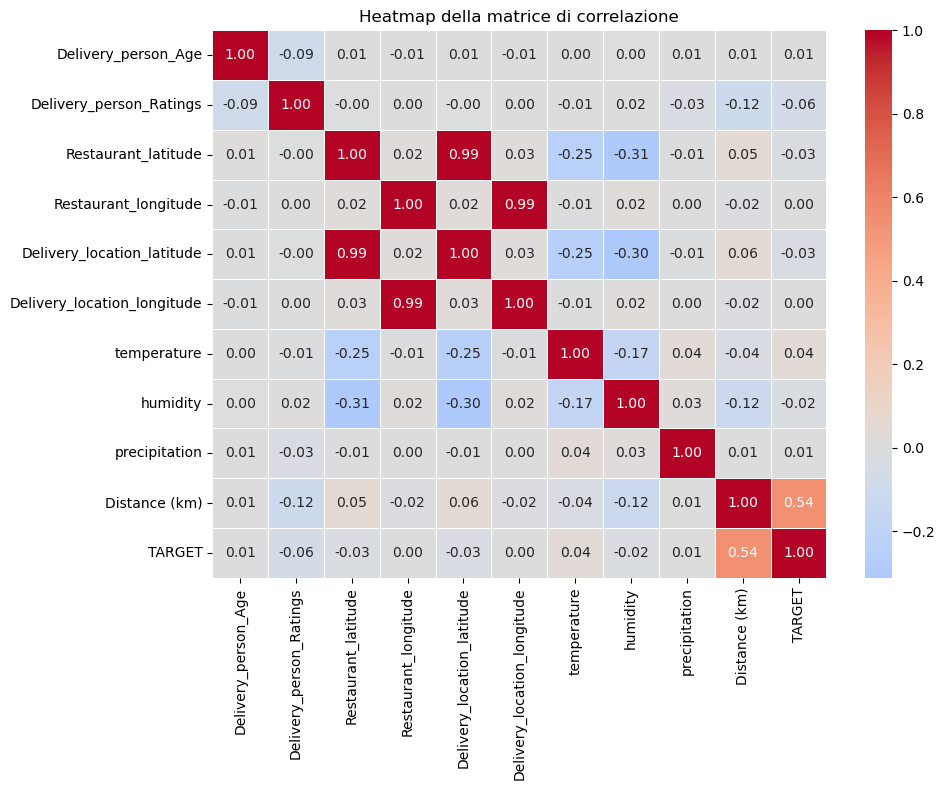

<Figure size 1500x1300 with 0 Axes>

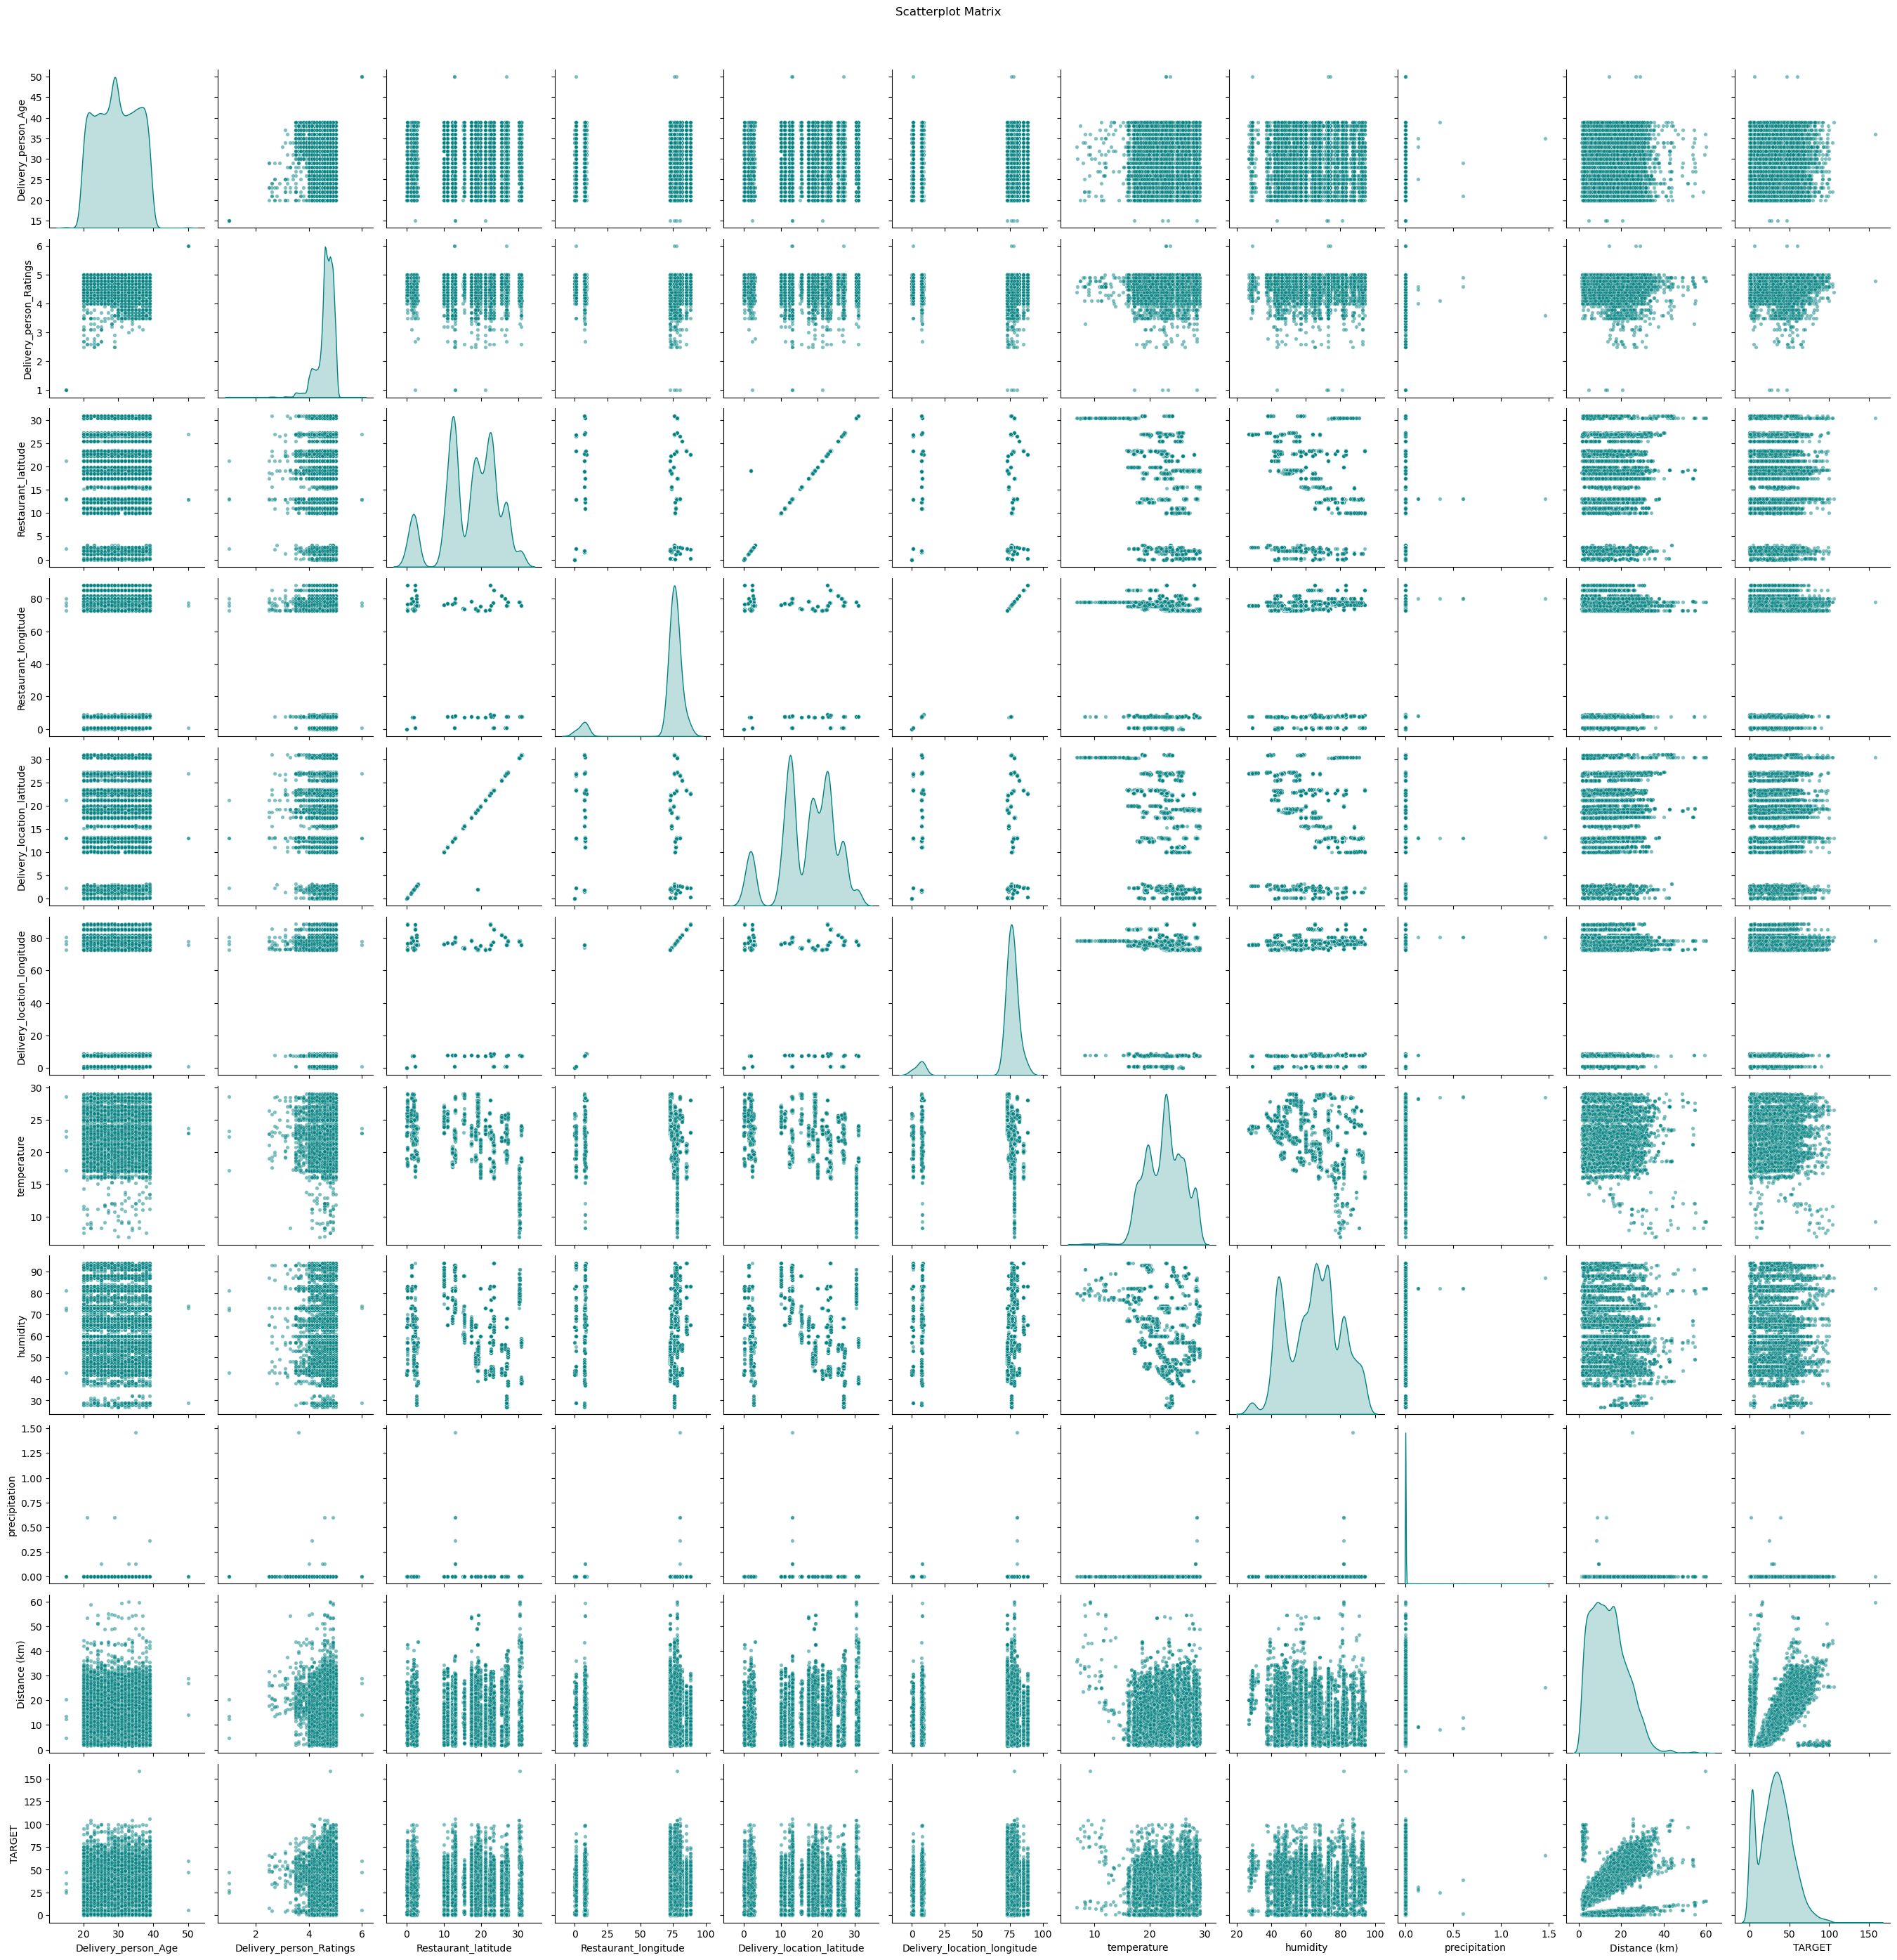

In [170]:

import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")
plt.title("Heatmap della matrice di correlazione")
plt.tight_layout()
plt.show()



plt.figure(figsize=(15, 13))
g = sns.pairplot(num_df, 
                 diag_kind='kde', 
                 plot_kws={'alpha': 0.5, 's': 15, 'color': 'teal'},
                 diag_kws={'color': 'teal', 'fill': True},
                 height=2.5)

g.figure.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

In [171]:
print(df["weather_description"].value_counts())

weather_description
clear sky           3211
haze                2378
mist                1740
broken clouds        532
smoke                498
scattered clouds     409
overcast clouds      182
fog                   49
few clouds            40
moderate rain          1
Name: count, dtype: int64


In [172]:
print(df["Type_of_order"].value_counts())

Type_of_order
Snack     2310
Meal      2281
Drinks    2276
Buffet    2173
Name: count, dtype: int64


In [173]:
print(df["Type_of_vehicle"].value_counts())

Type_of_vehicle
motorcycle          5350
scooter             2971
electric_scooter     709
bicycle               10
Name: count, dtype: int64


<Axes: xlabel='Type_of_vehicle', ylabel='TARGET'>

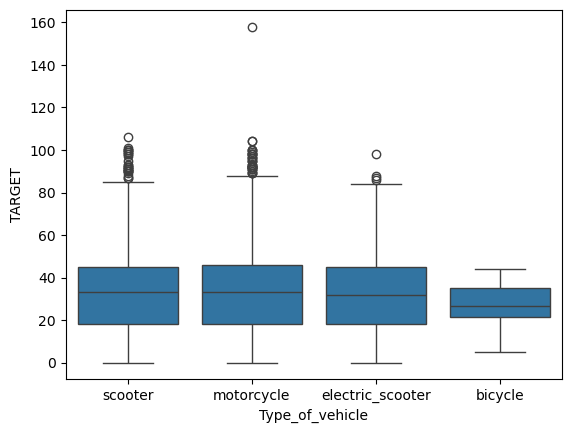

In [174]:
sns.boxplot(data=df, x="Type_of_vehicle", y="TARGET")


<Axes: xlabel='Type_of_order', ylabel='TARGET'>

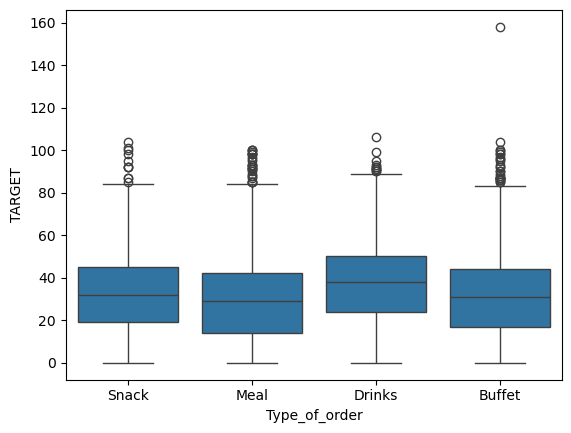

In [175]:
sns.boxplot(data=df, x="Type_of_order", y="TARGET")


<Axes: xlabel='weather_description', ylabel='TARGET'>

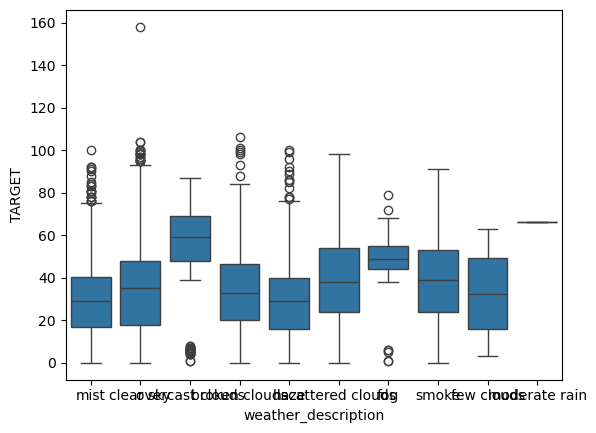

In [176]:
sns.boxplot(data=df, x="weather_description", y="TARGET")


In [177]:
df.loc[df["Type_of_vehicle"] == "bicycle", "Type_of_vehicle"] = "scooter"


In [178]:
other = ["moderate rain", "few clouds", "fog"]
df["weather_description"] = df["weather_description"].replace(other, "other")

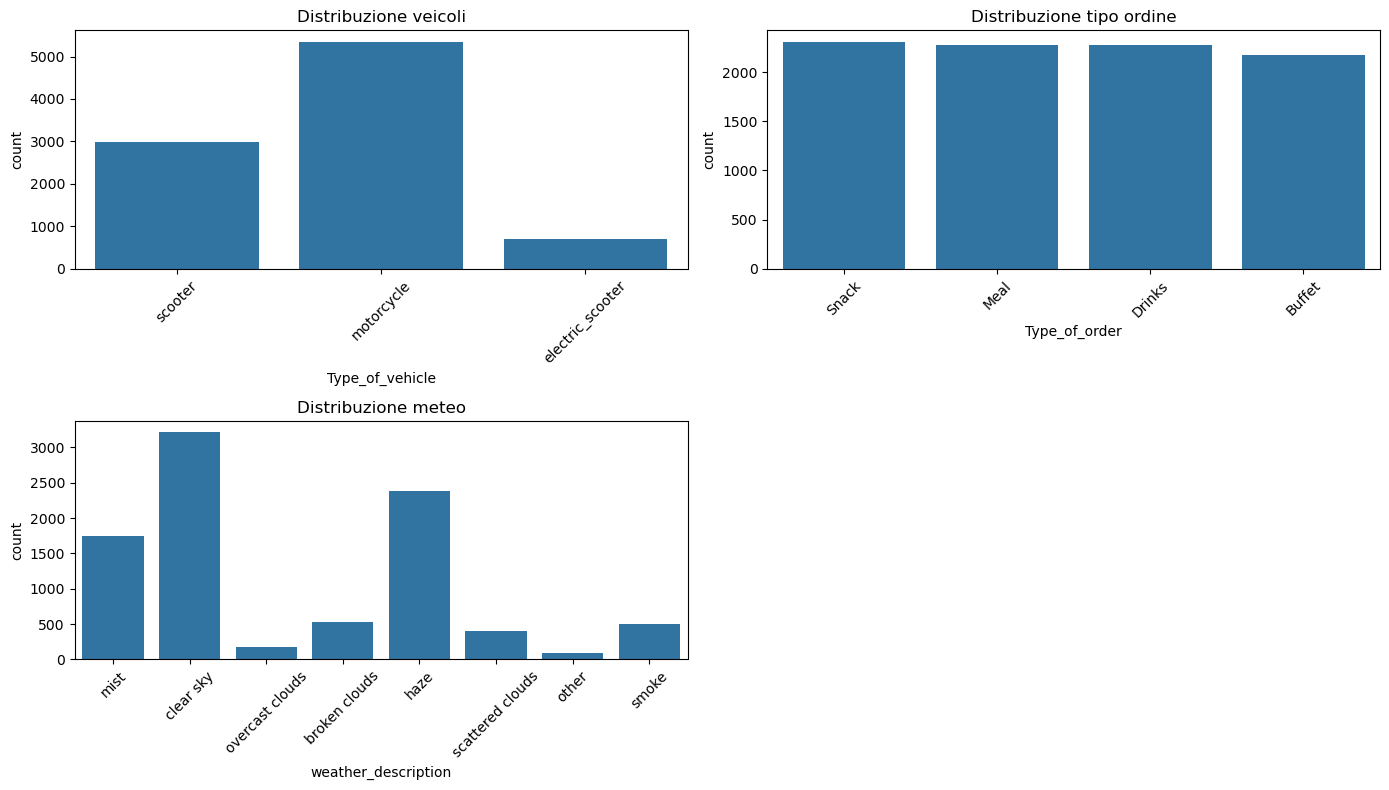

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.countplot(data=df, x="Type_of_vehicle")
plt.title("Distribuzione veicoli")
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.countplot(data=df, x="Type_of_order")
plt.title("Distribuzione tipo ordine")
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.countplot(data=df, x="weather_description")
plt.title("Distribuzione meteo")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

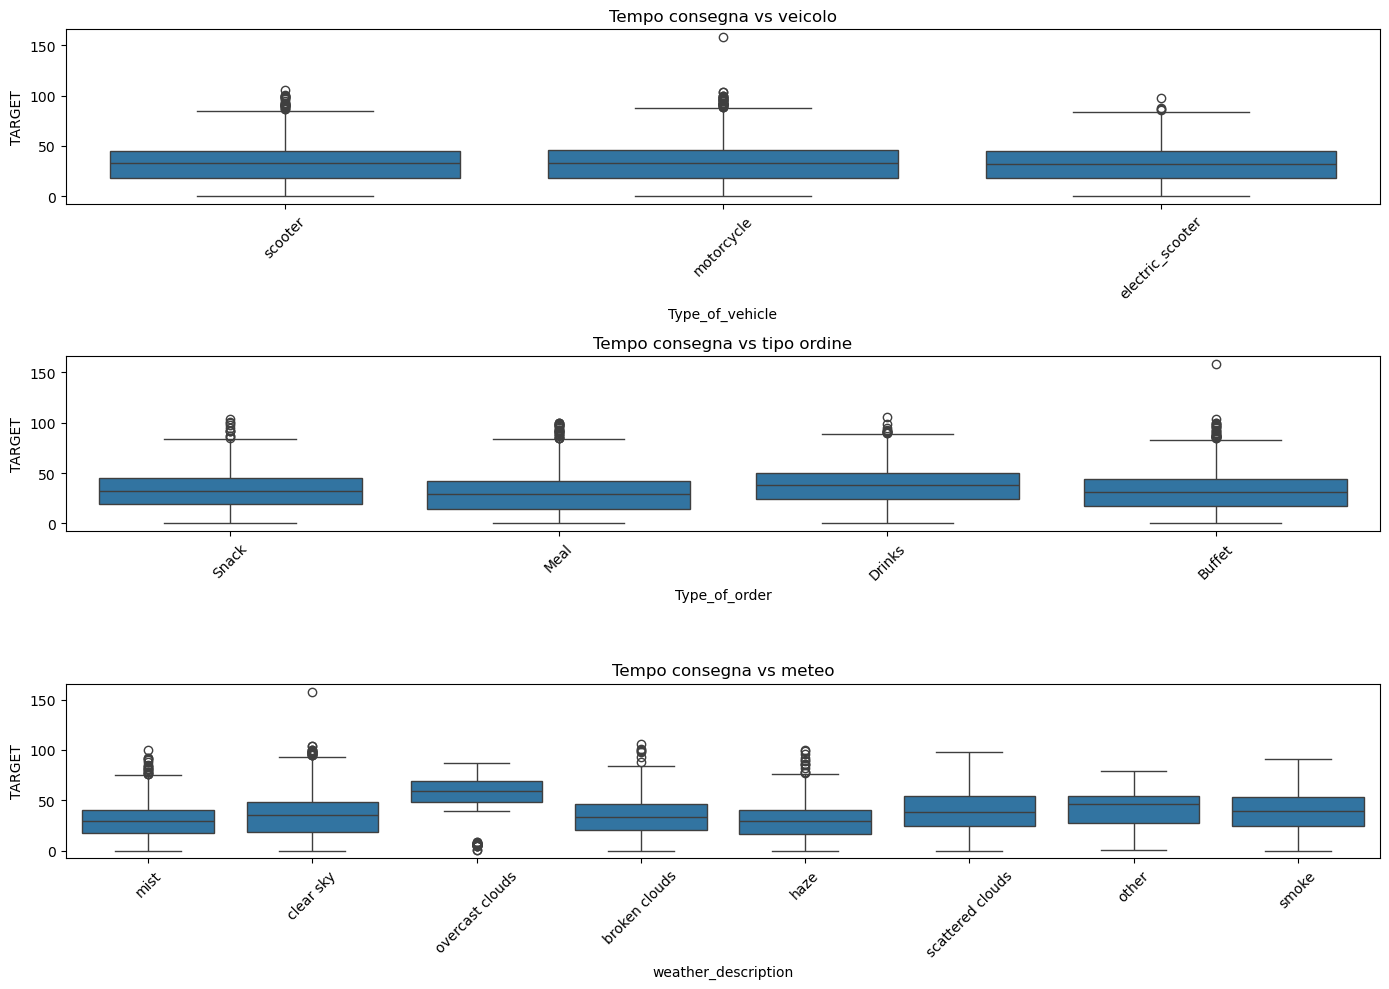

In [180]:
plt.figure(figsize=(14,10))

plt.subplot(3,1,1)
sns.boxplot(data=df, x="Type_of_vehicle", y="TARGET")
plt.title("Tempo consegna vs veicolo")
plt.xticks(rotation=45)

plt.subplot(3,1,2)
sns.boxplot(data=df, x="Type_of_order", y="TARGET")
plt.title("Tempo consegna vs tipo ordine")
plt.xticks(rotation=45)

plt.subplot(3,1,3)
sns.boxplot(data=df, x="weather_description", y="TARGET")
plt.title("Tempo consegna vs meteo")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### TARGET/ DISTANZA 

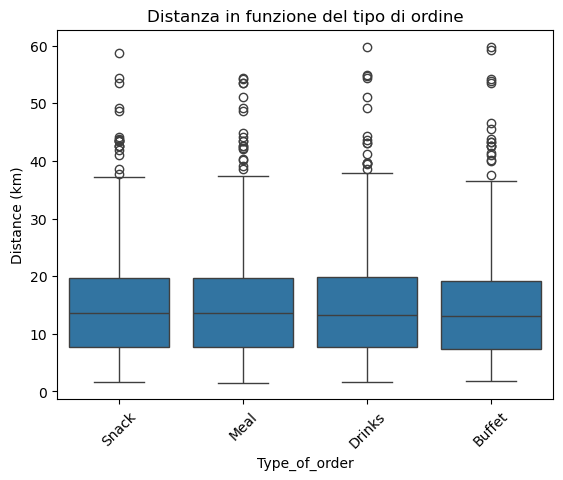

In [181]:
sns.boxplot(data=df, x="Type_of_order", y="Distance (km)")
plt.title("Distanza in funzione del tipo di ordine")
plt.xticks(rotation=45)
plt.show()

### CONSIDERAZIONI 
    # LA TIPOLOGIA DI ORDINE NON DETERMINA QUANTO è LONTANO IL CLIENTE  

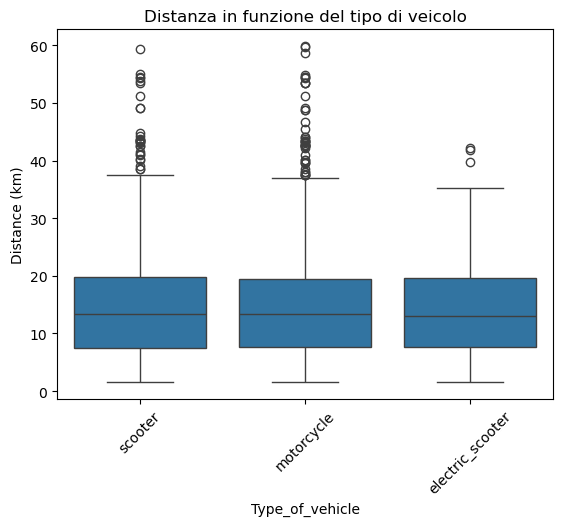

In [182]:
sns.boxplot(data=df, x="Type_of_vehicle", y="Distance (km)")
plt.title("Distanza in funzione del tipo di veicolo")
plt.xticks(rotation=45)
plt.show()

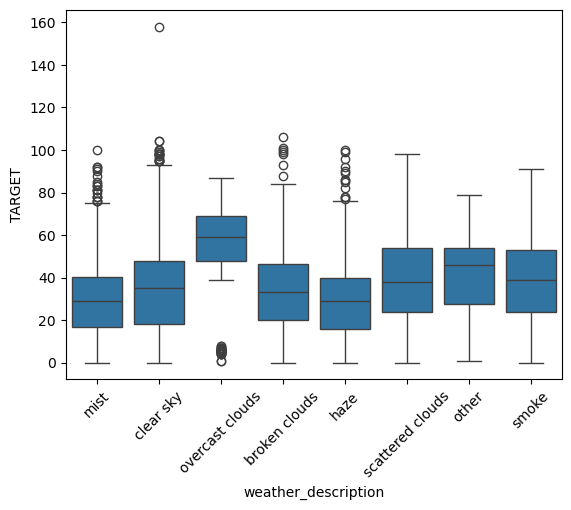

In [183]:
sns.boxplot(data=df, x="weather_description", y="TARGET")
plt.xticks(rotation=45)
plt.show()


In [184]:
categorical_cols = [
    "weather_description",
    "Type_of_order",
    "Type_of_vehicle"
]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [185]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9040 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Traffic_Level                         9040 non-null   object 
 1   Delivery_person_ID                    9040 non-null   object 
 2   Delivery_person_Age                   9040 non-null   int64  
 3   Delivery_person_Ratings               9040 non-null   float64
 4   Restaurant_latitude                   9040 non-null   float64
 5   Restaurant_longitude                  9040 non-null   float64
 6   Delivery_location_latitude            9040 non-null   float64
 7   Delivery_location_longitude           9040 non-null   float64
 8   temperature                           9040 non-null   float64
 9   humidity                              9040 non-null   float64
 10  precipitation                         9040 non-null   float64
 11  Distance (km)         

In [186]:
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})


In [187]:
df = df.drop(columns=["Delivery_person_ID"])

In [188]:
df.head()


,Traffic_Level,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,...,weather_description_mist,weather_description_other,weather_description_overcast clouds,weather_description_scattered clouds,weather_description_smoke,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,High,32,4.6,12.972793,80.249982,13.012793,80.289982,26.55,87.0,0.0,...,1,0,0,0,0,0,0,1,0,1
1,High,33,4.7,23.369746,8.533982,23.479746,8.544982,17.51,69.0,0.0,...,0,0,0,0,0,0,1,0,0,1
2,High,36,4.2,30.327968,78.046106,30.397968,78.116106,12.44,77.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,High,23,4.7,1.856245,73.916619,1.865245,74.006619,19.37,65.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,High,34,4.9,17.426228,78.407495,17.496228,78.477495,21.29,64.0,0.0,...,0,0,1,0,0,0,0,1,1,0
